## 1. Import libraries and load datasets 

In [1]:
# Data preprocessing 
import pandas as pd

# Efficient vectorial calculus
import numpy as np

# Timer
import time

# Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
# Load dataset in a Pandas DataFrame object from a .csv file
df = pd.read_csv('../data/loan.csv', low_memory=False)

# Show first rows
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,1077501,1296599,5000.0,5000.0,4975.0,36 months,10.65,162.87,B,B2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1077430,1314167,2500.0,2500.0,2500.0,60 months,15.27,59.83,C,C4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1077175,1313524,2400.0,2400.0,2400.0,36 months,15.96,84.33,C,C5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1076863,1277178,10000.0,10000.0,10000.0,36 months,13.49,339.31,C,C1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1075358,1311748,3000.0,3000.0,3000.0,60 months,12.69,67.79,B,B5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
# Load .xlxs file to have a complete description of the meaning of the different columns
df_xlxs = pd.read_excel('../data/LCDataDictionary.xlsx').dropna()
df_xlxs[df_xlxs.LoanStatNew == "loan_status"]

,LoanStatNew,Description
32,loan_status,Current status of the loan


## 2. Exploratory Data Analysis (Section 1) 

### a) Dataset overview 

In [4]:
print("Shape of the dataset: ", df.shape, " \n")
print("Columns of the dataset: ", df.columns, " \n")
print("Number columns: ", len(df.columns))

Shape of the dataset:  (887379, 74)  

Columns of the dataset:  Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'pymnt_plan', 'url', 'desc', 'purpose',
       'title', 'zip_code', 'addr_state', 'dti', 'delinq_2yrs',
       'earliest_cr_line', 'inq_last_6mths', 'mths_since_last_delinq',
       'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'out_prncp',
       'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp',
       'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt',
       'next_pymnt_d', 'last_credit_pull_d', 'collections_12_mths_ex_med',
       'mths_since_last_major_derog', 'policy_code', 'application_type',
       'a

In [5]:
# Data for the take-home assignment
df_def = df[["loan_amnt", "funded_amnt", "term", "int_rate", "grade", "annual_inc", "issue_d",
"dti", "revol_bal", "total_pymnt", "loan_status"]]

In [6]:
df_def.head()
# Response Variable: Categorical feature loan_status
# Covariates: Rest of columns

,loan_amnt,funded_amnt,term,int_rate,grade,annual_inc,issue_d,dti,revol_bal,total_pymnt,loan_status
0,5000.0,5000.0,36 months,10.65,B,24000.0,Dec-2011,27.65,13648.0,5861.071414,Fully Paid
1,2500.0,2500.0,60 months,15.27,C,30000.0,Dec-2011,1.00,1687.0,1008.710000,Charged Off
2,2400.0,2400.0,36 months,15.96,C,12252.0,Dec-2011,8.72,2956.0,3003.653644,Fully Paid
3,10000.0,10000.0,36 months,13.49,C,49200.0,Dec-2011,20.00,5598.0,12226.302212,Fully Paid
4,3000.0,3000.0,60 months,12.69,B,80000.0,Dec-2011,17.94,27783.0,3242.170000,Current


### b) Null values

In [7]:
# Count NaN values per column
print(df_def.isnull().sum())

loan_amnt      0
funded_amnt    0
term           0
int_rate       0
grade          0
annual_inc     4
issue_d        0
dti            0
revol_bal      0
total_pymnt    0
loan_status    0
dtype: int64


The number of training examples with NaN values is **very small** (with respe as can be seen from the above Pandas Series. Therefore, we are going just to drop the rows that contain NaN values in the annual_inc column.

In [8]:
# Show rows with NaN Values in column "annual_inc"
list(df_def[df_def["annual_inc"].isnull()].index)

[42449, 42450, 42480, 42533]

In [9]:
# Overwrite dataframe
df_def=df_def.dropna()

In [10]:
# Sanity Check
print(df_def.isnull().sum())

loan_amnt      0
funded_amnt    0
term           0
int_rate       0
grade          0
annual_inc     0
issue_d        0
dti            0
revol_bal      0
total_pymnt    0
loan_status    0
dtype: int64


### c) Distribution data

##### Loan amount

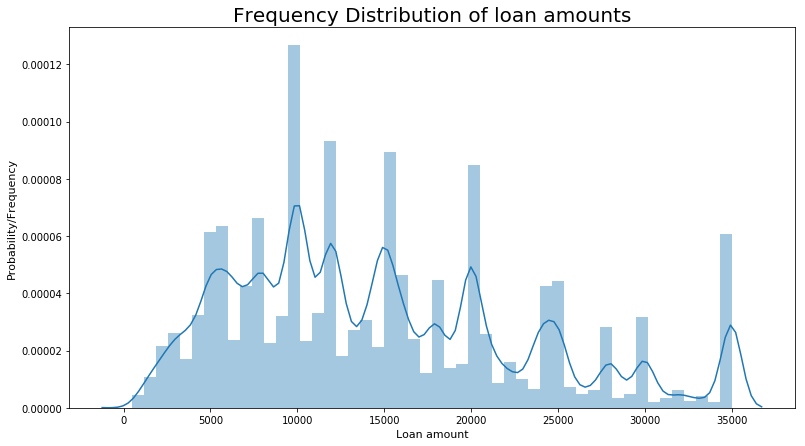

In [11]:
plt.figure(figsize=(13, 7))

g = sns.distplot(df_def["loan_amnt"])
g.set_xlabel("Loan amount", fontsize=11)
g.set_ylabel("Probability/Frequency", fontsize=11)
g.set_title("Frequency Distribution of loan amounts", fontsize=20)

plt.show()

##### Loan Status 

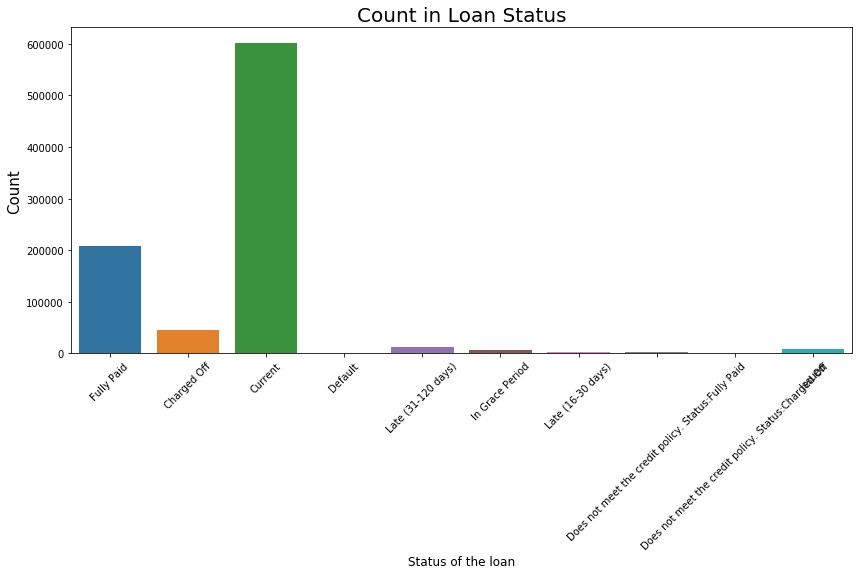

In [12]:
plt.figure(figsize = (14,6))

g = sns.countplot(x="loan_status", data=df_def)
g.set_xticklabels(g.get_xticklabels(),rotation=45)
g.set_xlabel("Status of the loan", fontsize=12)
g.set_ylabel("Count", fontsize=15)
g.set_title("Count in Loan Status", fontsize=20)

plt.show()

### c) Summary statistics

In [13]:
df_def.describe()

,loan_amnt,funded_amnt,int_rate,annual_inc,dti,revol_bal,total_pymnt
count,887375.000000,887375.000000,887375.000000,8.873750e+05,887375.000000,8.873750e+05,887375.000000
mean,14755.302719,14741.915678,13.246764,7.502759e+04,18.157113,1.692086e+04,7558.828791
std,8435.455353,8429.897443,4.381862,6.469830e+04,17.190629,2.242681e+04,7871.260790
min,500.000000,500.000000,5.320000,0.000000e+00,0.000000,0.000000e+00,0.000000
25%,8000.000000,8000.000000,9.990000,4.500000e+04,11.910000,6.443500e+03,1914.590000
50%,13000.000000,13000.000000,12.990000,6.500000e+04,17.650000,1.187500e+04,4894.950000
75%,20000.000000,20000.000000,16.200000,9.000000e+04,23.950000,2.082900e+04,10616.844231
max,35000.000000,35000.000000,28.990000,9.500000e+06,9999.000000,2.904836e+06,57777.579870


## 3. Business analysis (Section 2) 

#### Question a) 

For this section, we are only analyzing 36 month term loans.  

In [14]:
# See format "term" column
df_def["term"].iloc[0]

' 36 months'

In [15]:
# Select 36 month term loans
df_def_36m = df_def[df_def.term == " 36 months"]

In [16]:
df_def_36m.head()

,loan_amnt,funded_amnt,term,int_rate,grade,annual_inc,issue_d,dti,revol_bal,total_pymnt,loan_status
0,5000.0,5000.0,36 months,10.65,B,24000.0,Dec-2011,27.65,13648.0,5861.071414,Fully Paid
2,2400.0,2400.0,36 months,15.96,C,12252.0,Dec-2011,8.72,2956.0,3003.653644,Fully Paid
3,10000.0,10000.0,36 months,13.49,C,49200.0,Dec-2011,20.00,5598.0,12226.302212,Fully Paid
5,5000.0,5000.0,36 months,7.90,A,36000.0,Dec-2011,11.20,7963.0,5631.377753,Fully Paid
7,3000.0,3000.0,36 months,18.64,E,48000.0,Dec-2011,5.35,8221.0,3938.144334,Fully Paid


In [ ]:
df_def_36m.shape

(621121, 11)

In [ ]:
# Simplify loan_status labels to avoid confusion
df_def_36m[df_def_36m.loan_status=="Does not meet the credit policy. Status:Charged Off"] = "Charged Off"
df_def_36m[df_def_36m.loan_status=="Does not meet the credit policy. Status:Fully Paid"] = "Fully Paid"

/Users/cbartolm/anaconda/envs/cs230/lib/python3.5/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/cbartolm/anaconda/envs/cs230/lib/python3.5/site-packages/pandas/core/indexing.py:517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [ ]:
df_def_36m.groupby(by = "loan_status").count()

In [ ]:
# Compute percentage of fully paid loans
percent_fully_paid = sum(df_def_36m.loan_status == "Fully Paid")/df_def_36m.shape[0]

In [ ]:
result1 = percent_fully_paid*100
result1

The percentage of loans that have been fully paid is **27.267%**

#### Question b)

Simplifying assumption: We are ignoring the months, we just take into account the year.

In [ ]:
# Parse the year from the issue_d column (get rid of months)
df_def_36m["issue_d"] = df_def_36m["issue_d"].apply(lambda x: x[-4:])

In [ ]:
groupby_issued_grade = df_def_36m.groupby(by =["issue_d","grade"])

In [ ]:
results = {}
for group in groupby_issued_grade.groups.keys():
    # Handle parsing edge_case
    if group == (' Off', 'Charged Off') or group == ('Paid', 'Fully Paid') :
        continue
    df_group = groupby_issued_grade.get_group(group)
    
    #Compute default rate
    results[group] = sum(df_group.loan_status != "Fully Paid")/df_group.shape[0]

In [ ]:
rate_of_defaults = pd.Series(results)
print(rate_of_defaults, " \n")
max(rate_of_defaults.values)

In [ ]:
rate_of_defaults[rate_of_defaults == max(rate_of_defaults.values)]

The cohort with highest rate of defaults is the one that **had Grade A in year 2015**. It makes sense as the last year of the dataset is 2015 and we have lots of new loans that haven't been completed. 

#### Question c)

In [ ]:
results_qc = {}
for group in groupby_issued_grade.groups.keys():
    # Handle parsing edge_case
    if group == (' Off', 'Charged Off') or group == ('Paid', 'Fully Paid') :
        continue
    df_group = groupby_issued_grade.get_group(group)
    
    # Annualized rate of return 
    results_qc[group] = (df_group.total_pymnt.sum()/df_group.funded_amnt.sum()) ** (1/3) - 1  

In [ ]:
# Rate of return each group (Needs review!)
results_qc